In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import nltk
import seaborn as sns


from wordcloud import WordCloud
from PIL import Image
from nltk import word_tokenize
from nltk.corpus import stopwords
from string import punctuation

## exploration of [UvA Alma Beelbank](https://uba.uva.nl/en/support/open-data/data-sets-and-publication-channels/data-sets-and-publication-channels.html#Archeological-objects)

In [7]:
alma_beeldbank = pd.read_xml('data/uva_alma_beeldbank_dc_new.xml')

In [8]:
print(alma_beeldbank.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   schemaLocation  35564 non-null  object
 1   title           35564 non-null  object
 2   description     35512 non-null  object
 3   publisher       29517 non-null  object
 4   contributor     28220 non-null  object
 5   date            35093 non-null  object
 6   type            897 non-null    object
 7   identifier      35564 non-null  object
 8   language        35564 non-null  object
 9   relation        35496 non-null  object
 10  subject         10883 non-null  object
 11  coverage        2050 non-null   object
 12  format          5390 non-null   object
 13  source          1 non-null      object
dtypes: object(14)
memory usage: 3.8+ MB
None


<AxesSubplot:xlabel='type', ylabel='count'>

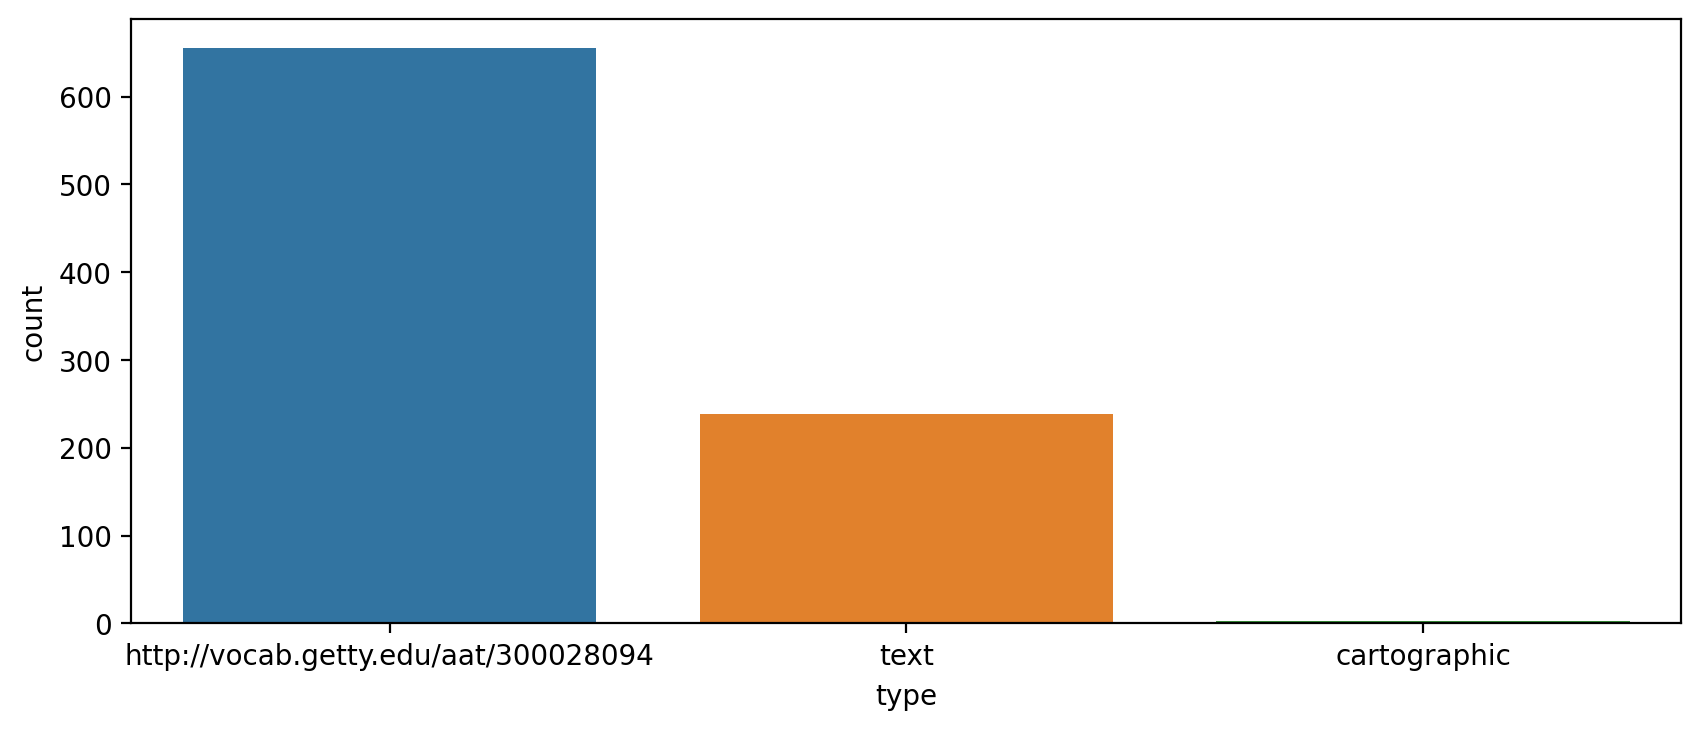

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(x='type',data=alma_beeldbank)

In [10]:
print('10 most occuring formats in beelbank data: \n', alma_beeldbank['format'].value_counts().iloc[:10])

10 most occuring formats in beelbank data: 
 vorm                            932
handgemaakt: aquarel            838
op de schijf gedraaid           399
aardewerkmateriaal              300
sculptuur, afgietsel in gips    241
offset                          209
geschilderd                     205
gedrukt: lithografie            167
vlakdruk                        141
sculptuur                       135
Name: format, dtype: int64


In [11]:
print('unique entries in language category:\n', alma_beeldbank['language'].unique())

unique entries in language category:
 ['fre' 'dut' 'yid' 'heb' 'lat' 'arm' 'arc' 'spa' 'ita' 'ger' 'por' 'eng'
 'goh' 'nds' 'und' 'grc' 'mul' 'ara' 'fry' 'mis' 'swe' 'afr' 'may' 'san'
 'chi' 'nor' 'rus' 'dan' 'map' 'jav' 'sun' 'dum' 'epo' 'gre' 'ben' 'hun'
 'paa' 'fin' 'pol' 'ban' 'per' 'Nederlands [TA].' 'hin' 'ind' 'egy' 'xxx'
 'Text in Latin and Dutch.' 'Hebreeuws in Latijns schrift.'
 'Duits met Hebreeuwse letters.' 'In het Duits met Hebreeuwse letters.'
 'Duits met Hebreeuwse.' 'Tekst in het Duits met Hebreeuwse letters.'
 'Taal onduidelijk, vermoedelijk Duits.'
 'Taal: misschien Hebreeuws in transcriptie.'
 'Taal onduidelijk, vermoedelijk Hebreeuws in transcriptie.']


In [12]:
print('value counts in language category per language:\n', alma_beeldbank['language'].value_counts())

value counts in language category per language:
 dut                                                          13451
heb                                                           9764
xxx                                                           8702
ger                                                            992
fre                                                            664
lat                                                            634
eng                                                            576
und                                                            183
yid                                                            151
spa                                                             70
Duits met Hebreeuwse letters.                                   44
fry                                                             39
grc                                                             34
dan                                                             30
por          

In [13]:
print('unique authors of items in beeldbank:\n', alma_beeldbank['contributor'].unique())

unique authors of items in beeldbank:
 ['Quellinus, Artus (Artus), beeldhouwer, 1609-1668. (NL-LeOCL)091438969 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839288655305131.jsonld'
 'Lennep, J. van (Jacob), 1802-1868, publisher (NL-LeOCL)06833544X https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839182012305131.jsonld'
 'Zevi Hirsh ben Abraham transcriber' ...
 'Mascarenhas, Pero (NL-LeOCL)144244322 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839331252005131.jsonld'
 'Sampayo, Lopo Vaz de, 1526 fl. (NL-LeOCL)144243121 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839331253705131.jsonld'
 'Śaśporṭaś, Yaʿaqov (Jacob), 1610-1698. (NL-LeOCL)109311817 https://open-na.hosted.exlibrisgroup.com/alma/31UKB_UAM1_INST/authorities/9839298098705131.jsonld']


In [14]:
print('n0 of occuring items per author:\n', alma_beeldbank['contributor'].value_counts())

n0 of occuring items per author:
 Pekidim & Amarkalim (Amsterdam) rcp                                                                                                                                 10044
H. G. Bom Amsterdam                                                                                                                                                   270
G. Th. Bom & Zn Amsterdam                                                                                                                                             156
J. L. Beijers Utrecht                                                                                                                                                 156
R. W. P. de Vries Amsterdam                                                                                                                                           126
                                                                                                                    

In [15]:
unique_dates = alma_beeldbank['date'].unique()

In [16]:
print('items per year: ', alma_beeldbank['date'].value_counts().to_markdown())

items per year:  |                                                      |   date |
|:-----------------------------------------------------|-------:|
| 1889                                                 |   1548 |
| 1887                                                 |   1518 |
| 1888                                                 |   1282 |
| 1918                                                 |   1066 |
| 1917                                                 |   1052 |
| 1916                                                 |   1050 |
| 1915                                                 |   1049 |
| 1919                                                 |   1032 |
| 1910                                                 |    916 |
| 1914                                                 |    885 |
| 1883                                                 |    860 |
| 1899                                                 |    830 |
| 1900                                                 |   

In [17]:
alma_beeldbank = alma_beeldbank.dropna(subset=['date'])

In [18]:
alma_beeldbank = alma_beeldbank[alma_beeldbank['date'].str.isnumeric()]

In [19]:
alma_beeldbank['date'] = alma_beeldbank['date'].astype(int)

In [20]:
alma_beeldbank = alma_beeldbank[alma_beeldbank['date'] <= 2022]

In [21]:
alma_beeldbank = alma_beeldbank.sort_values('date')

In [22]:
alma_beeldbank['date'].value_counts(sort=False)

1       16
20       5
30       2
34       1
41       1
        ..
2002     1
2004     3
2005     5
2006     2
2007    13
Name: date, Length: 498, dtype: int64

In [23]:
# plt.figure(figsize=(8,4),dpi=200)
# sns.countplot(x='date', data=alma_beeldbank)
# plt.xticks(size=10)


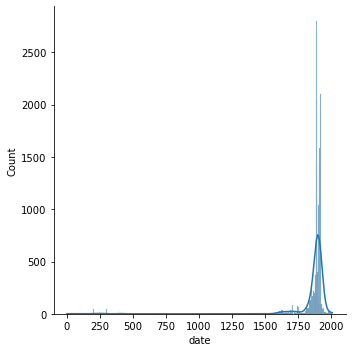

In [24]:
sns.displot(data=alma_beeldbank, x='date', kde=True)

### Some analysis of the descriptions

In [25]:
joined = " ".join(alma_beeldbank['title'].dropna().unique())

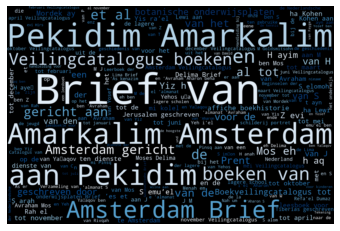

In [26]:
# code copied from: https://jingwen-z.github.io/data-viz-with-matplotlib-series9-word-cloud/

wordcloud = WordCloud(width=1280, height=853, margin=0,
                      colormap='Blues').generate(joined)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

## Beeldbank marc
### short analysis of the beeldbank marc data

In [27]:
alma_beeldbank_marc = pd.read_xml('data/uva_alma_beeldbank_marc_new.xml')
titles = [record.title() for record in alma_beeldbank_marc]

In [28]:
# vergelijking van marc en dublin core record. 
# een aantal velden missen/maar waren hoogstwaarschijnlijk niet nuttig geacht. 

example_record = alma_beeldbank_marc[0]
print(example_record)

print('comparison with \n')

for name, values in alma_beeldbank.loc[0].iteritems():
    print(values)

KeyError: 0

marc extension, [download](https://diensten.uba.uva.nl/open_data/downloads/uva_alma_archobjects_marc_new.tar.gz) first edited from xml to marc using [marc editing tool](https://marcedit.reeset.net/downloads). 

## theater dataset
### preprocessing done on the theatre collections dataset.

In [ ]:
tin = pd.read_xml('data/wwwopac_TIN_limit100000.xml')
tin

In [ ]:
# just one record
tin_1 = pd.read_xml('data/theatercollecties_test1.xml')
tin_1

### mapping from XML data format to LOD format

In [29]:
'''
code below provides a mapping from xml format to LOD format. 
some fields were considered as a test. 
'''

# read in data
tin_1 = pd.read_xml('data/theatercollecties_test1.xml')
values = [tin_1[c].iloc[tin_1[c].first_valid_index()] for c in tin_1.columns]

# expects list of tuples: [('column name', 'column_value'), ..., ]
def to_lod(input_field):
    if input_field[0] == 'creator':
        return ('http://purl.org/dc/elements/1.1/creator', input_field[1])
    if input_field[0] == 'creator.role':
        return ('http://purl.org/dc/elements/1.1/creator', input_field[1])
    if input_field[0] == 'performance.title':
        return ('https://www.dublincore.org/specifications/dublin-core/dcmi-terms/elements11/title/', input_field[1])
    if input_field[0] == 'production.date':
        return ('http://purl.org/dc/elements/1.1/date', input_field[1])
    if input_field[0] == 'reproduction.reference':
        return ('http://purl.org/dc/elements/1.1/identifier', input_field[1])
    if input_field[0] == 'object_category':
        return ('https://www.dublincore.org/specifications/dublin-core/dcmi-terms/elements11/type/', input_field[1])
    else: 
        return input_field

# maps input to appropriate output format
result = map(to_lod, list(zip(tin_1.columns, values)))
lod_result = pd.DataFrame(result, columns= ['predicate', 'object'])
lod_result

,predicate,object
0,http://purl.org/dc/elements/1.1/creator,"Roelofs, Charles"
1,http://purl.org/dc/elements/1.1/creator,ontwerp
2,New_collect_field,Gelegenheidscombinaties
3,performance.production_code,123890453.001
4,https://www.dublincore.org/specifications/dubl...,Aias
5,performance.title.lref,21012.0
6,http://purl.org/dc/elements/1.1/date,1939-05-23
7,reproduction.identifier_URL,qm00217.000.jpg
8,http://purl.org/dc/elements/1.1/identifier,qm00217.000
9,institution.name,Theater Instituut Nederland
